# Transformação de imagens

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [ ]:
%cd fiap-ml-visao-computacional/aula-3-segmentacao/

Importação das biblitecas.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

## 2. Suavização de imagens

A suavização de imagens (ou Blurring) auxilia no processo de remoção de ruídos e diminuição de detalhes de uma imagem.

In [2]:
retangulo = np.zeros((200,200), np.uint8)
cv2.rectangle(retangulo, (40,40), (160,160), 255, -2)

imagem_suav_padrao = cv2.blur(retangulo, (15,15))
imagem_suav_mediana = cv2.medianBlur(retangulo, 15)
imagem_suav_gaussian = cv2.GaussianBlur(retangulo, (15, 15), 0)

Text(0.5, 1.0, 'Gaussiana')

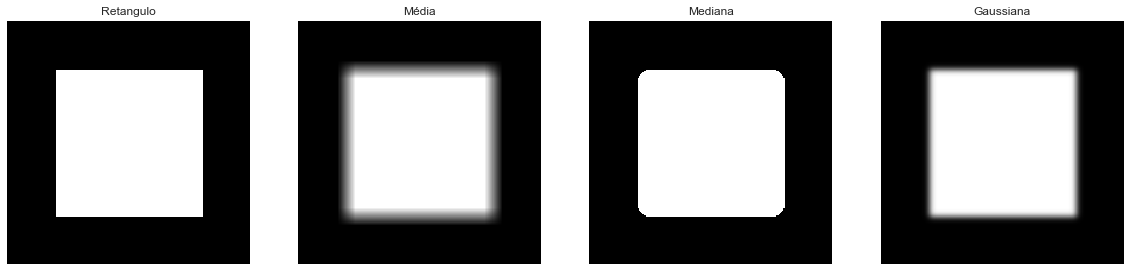

In [3]:
plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(retangulo, cmap="gray")
plt.title("Retangulo")

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(imagem_suav_padrao, cmap="gray")
plt.title("Média")

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(imagem_suav_mediana, cmap="gray")
plt.title("Mediana")

plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(imagem_suav_gaussian, cmap="gray")
plt.title("Gaussiana")

Text(0.5, 1.0, 'Carro')

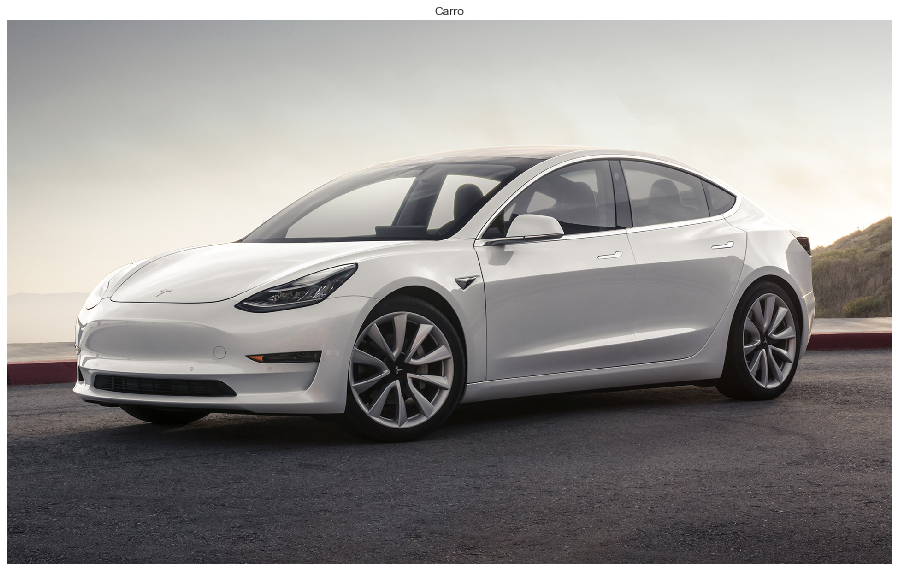

In [4]:
imagem = cv2.imread("imagens/tesla.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem)
plt.title("Carro")

In [ ]:
imagem_suav_padrao = cv2.blur(imagem, (15,15))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_suav_padrao)
plt.title("Suavização Média")

In [ ]:
imagem_suav_mediana = cv2.medianBlur(imagem, 15)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_suav_mediana)
plt.title("Suavização Mediana")

In [ ]:
imagem_suav_gaussian = cv2.GaussianBlur(imagem, (15, 15), 0)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_suav_gaussian)
plt.title("Suavização Gaussiana")

Função para adicionar ruído do tipo _pepper & salt_. 
Algoritmo obtido neste [post](https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv), no Stackoverflow.

In [ ]:
def sp_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
imagem_tesla = cv2.imread("imagens/tesla-x.jpg")
imagem_tesla = cv2.cvtColor(imagem_tesla, cv2.COLOR_BGR2RGB)

imagem_ruido = sp_noise(imagem_tesla, 0.05)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_ruido)
plt.title("Imagem com ruído")

In [ ]:
imagem_suav_padrao = cv2.blur(imagem_ruido, (15,15))
imagem_suav_mediana = cv2.medianBlur(imagem_ruido, 15)
imagem_suav_gaussian = cv2.GaussianBlur(imagem_ruido, (15, 15), 0)

In [ ]:
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_suav_padrao)
plt.title("Suavização Média")

In [ ]:
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_suav_mediana)
plt.title("Suavização Mediana")

In [ ]:
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(imagem_suav_gaussian)
plt.title("Suavização Gaussiana")

## 3. Thresholding (Limiarização)

Técnicas de filtragem na imagem para remover ruídos ou regiões de interesse baseado no limiar de intensidade dos pixels.
Somente é permitido imagems em escala de cinza.

*Adaptado desta [documentação](https://docs.opencv.org/3.4.3/d7/d4d/tutorial_py_thresholding.html) do OpenCV*

In [ ]:
imagem = cv2.imread("imagens/car.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.title("Imagem Original")
plt.imshow(imagem, cmap="gray")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_limiarizada, cmap="gray")
plt.title("Limiarização binária")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem, 190, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(20,10))
plt.title("Limiarização binária invertida")
plt.imshow(imagem_limiarizada, cmap="gray")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem, 50, 255, cv2.THRESH_TRUNC)

plt.figure(figsize=(20,10))
plt.title("Limiarização por truncagem")
plt.imshow(imagem_limiarizada, cmap="gray")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem, 150, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 10))
plt.title("Limiarização para zero")
plt.imshow(imagem_limiarizada, cmap="gray")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem, 127, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(20, 10))
plt.title("Limiarização para zero invertido")
plt.imshow(imagem_limiarizada, cmap="gray")

### 3.1 Limiar adaptativo

Este tipo de limiar é mais suave e obtem melhores resultados particularmente em operações voltadas a documentos para etapas de OCR. 
A característica de adaptividade permite que o efeito do limiar leve em consideração aspectos internos da imagem e não seja penas um filtro que ignora toda informação em função dos limiares configurados.

*Adaptado desta [documentação](https://docs.opencv.org/3.4.3/d7/d4d/tutorial_py_thresholding.html) do OpenCV.*
*Imagem retirada deste [post](https://pythonprogramming.net/thresholding-image-analysis-python-opencv-tutorial/)*

In [ ]:
imagem = cv2.imread("imagens/bookpage.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 10))
plt.title("Original")
plt.imshow(imagem, cmap="gray")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem, 10, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.title("Limiarização")
plt.imshow(imagem_limiarizada, cmap="gray")

In [ ]:
imagem_suavizada = cv2.GaussianBlur(imagem, (5,5), 0)

plt.figure(figsize=(8, 10))
plt.title("Suavização")
plt.imshow(imagem_suavizada, cmap="gray")

In [ ]:
ret, imagem_limiarizada = cv2.threshold(imagem_suavizada, 20, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.title("Limiarização após Suavização")
plt.imshow(imagem_limiarizada, cmap="gray")

In [ ]:
imagem_limiarizada = cv2.adaptiveThreshold(imagem_suavizada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 2)

# O primeiro valor do parâmetro é o tamanho da janela, portanto sempre ímpar para considerar o valor do contro

plt.figure(figsize=(8, 10))
plt.title("Limiarização com Limiar Adaptativo")
plt.imshow(imagem_limiarizada, cmap="gray")

## 4. Erosão e Dilatação

São operações morfológicas que visam restarurar informação na imagem aplicando operações que podem, por exemplo, completar pixels adjacentes ou removê-los.

Quando trabalhamos com OCR em imagens obtidas de scanners ou placas de veículos de automóveis, dada a qualidade da captura destas imagens nem sempre é preservad a informação com mesma nitidez o suficiente para algoritmos de OCR (como o _Tesseract_) identificarem os carcteres adequadamente.

In [ ]:
imagem = cv2.imread("imagens/parking-lot.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 10))
plt.title("Faixas")
plt.imshow(imagem)

In [ ]:
imagem_gray = cv2.imread("imagens/parking-lot.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 10))
plt.title("Faixas")
plt.imshow(imagem_gray, cmap="gray")

In [ ]:
imagem_suavizada = cv2.GaussianBlur(imagem_gray, (1,1), 0)
ret, imagem_limiarizada = cv2.threshold(imagem_suavizada, 180, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.title("Limiarização após Suavização")
plt.imshow(imagem_limiarizada, cmap="gray")

In [ ]:
kernel = np.ones((3,3), np.uint8)
imagem_dilatacao = cv2.dilate(imagem_limiarizada, kernel, iterations=2)

plt.figure(figsize=(8, 10))
plt.title("Dilatação")
plt.imshow(imagem_dilatacao, cmap="gray")

In [ ]:
kernel = np.ones((1,1), np.uint8)
imagem_erosao = cv2.erode(imagem_limiarizada, kernel, iterations=1)

plt.figure(figsize=(8, 10))
plt.title("Erosão")
plt.imshow(imagem_erosao, cmap="gray")

## 5. Detecção de bordas

Os operações de detecção de bordas é o primeiro passo para segmentação de imagens, pois torna possível identificar objetos.
Existem diversas formas de detectar bordas, das quais a que mais se destaca é o método de Canny.

In [ ]:
imagem_gray = cv2.imread("imagens/woman.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 10))
plt.title("Mulher")
plt.imshow(imagem_gray, cmap="gray")

### 4.1 Método Canny

In [ ]:
borda_canny = cv2.Canny(imagem_gray, 40, 80)

plt.figure(figsize=(20, 10))
plt.title("Bordas")
plt.imshow(borda_canny, cmap="gray")

In [ ]:
 _, mask = cv2.threshold(borda_canny, 30, 255, cv2.THRESH_BINARY_INV)
    

plt.figure(figsize=(20, 10))
plt.title("Bordas")
plt.imshow(mask, cmap="gray")

## 5. Segmentação de imagens

Técnicas para identificação de objetos e formas.

## 5.1 Contornos

O primeiro passo para identificar contornos de objetos em imagens é aplicando operações de identificação de contornos.

In [ ]:
imagem_objetos = cv2.imread("imagens/formas.jpeg")
imagem_objetos = cv2.cvtColor(imagem_objetos, cv2.COLOR_BGR2RGB)

print(imagem_objetos.shape)

plt.figure(figsize=(20, 20))
plt.title("Objetos")
plt.imshow(imagem_objetos)

In [ ]:
imagem_objetos_gray = cv2.cvtColor(imagem_objetos,cv2.COLOR_BGR2GRAY)
imagem_objetos_bordas = cv2.Canny(imagem_objetos_gray, 1, 100)

plt.figure(figsize=(20, 20))
plt.title("Bordas")
plt.imshow(imagem_objetos_bordas)

In [ ]:
contornos_objetos, hierarchy_objetos = cv2.findContours(imagem_objetos_bordas, 
                                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_objetos)))

imagem_objetos_contornos = imagem_objetos.copy()
cv2.drawContours(imagem_objetos_contornos, contornos_objetos, -1, (0,255,0), 3)

plt.figure(figsize=(20, 20))
plt.title("Contornos")
plt.imshow(imagem_objetos_contornos)

Utilizando formas abertas da mesma imagem.

In [ ]:
contornos_objetos_internos, hierarchy = cv2.findContours(imagem_objetos_bordas, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_objetos_internos)))

for idx, contorno in enumerate(contornos_objetos_internos):
    (x, y, w, h) = cv2.boundingRect(contorno)
    area = int(w) * int(h)
    print("Contorno " + str(idx) + " " + str(area))

In [ ]:
imagem_contornos_internos = imagem_objetos.copy()
cv2.drawContours(imagem_contornos_internos, contornos_objetos_internos, -1, (0,255,0), 2)

plt.figure(figsize=(20, 20))
plt.title("Contornos")
plt.imshow(imagem_contornos_internos)

Os contornos adicionais encontrados são referentes a possíveis ruídos na imagem e na forma que os contornos são identificados. Há formas de conhecer melhor cada contorno e verificar se pode ser desconsiderado.

### 5.2 Ordenando Contornos

Assim como foi mostrado anteriormente, podemos trabalhar com as informações de contorno para determinar aspectos como área e posição que auxiliam no processo de remoção de ruídos.

In [ ]:
imagem = cv2.imread("imagens/objects.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print(imagem.shape)

plt.figure(figsize=(10, 10))
plt.title("Original")
plt.imshow(imagem)

In [ ]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_gray_suav = cv2.GaussianBlur(imagem_gray, (3,3), 0)
imagem_bordas = cv2.Canny(imagem_gray_suav, 40, 180)

plt.figure(figsize=(20, 10))
plt.title("Contornos")
plt.imshow(imagem_bordas)

In [ ]:
contornos_formas, hierarchy = cv2.findContours(imagem_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_formas)))

imagem_contornos = imagem.copy()

cv2.drawContours(imagem_contornos, contornos_formas, -1, (0,255,0), 2)

plt.figure(figsize=(20, 10))
plt.title("Contornos")
plt.imshow(imagem_contornos)

In [ ]:
def areas_contornos(contornos):
    areas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        areas.append(area)
    return areas

In [ ]:
areas_contornos(contornos_formas), len(areas_contornos(contornos_formas))

Algumas vezes, certas imagens podem apresentar pequenos contornos (com áreas entre 0 e 0,5, por exemplo) que são considerados ruídos. Neste caso podemos fazer uma limpeza nestes contornos para eliminar estes ruídos.
Para este exemplo vamos arbitrar que somente áreas maiores do que 1 sejam consideradas.

_Neste exemplo não houve nenhum ruído_

In [ ]:
areas_contornos(contornos_formas)
contornos_padronizados = []

for contorno in contornos_formas:
    if cv2.contourArea(contorno) > 1:
        contornos_padronizados.append(contorno)
    
len(contornos_formas), len(contornos_padronizados)

Na análise visual, agora o número de contornos identificados batem.

A função a seguir vai localizar o centróide de cada objeto na imagem para colocarmos um determinado texto. Este texto utilizaremos para identificar as imagens por tamanho de área e por posicionamento, as seguir.

In [ ]:
def label_centroide(imagem, contorno, identificacao):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    cv2.putText(imagem, str(identificacao), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

Ordenação decrescente baseado no tamanho da área. A função *sorted* irá analisar todos os itens do array de contornos, aplicar a função de cálculo de área e ordederá de forma reversa.

In [ ]:
contornos_ordenacao = sorted(contornos_padronizados, key=cv2.contourArea, reverse=True)

In [ ]:
len(contornos_ordenacao)

In [ ]:
imagem_contornos = imagem.copy()

for idx, contorno in enumerate(contornos_ordenacao):
    area = cv2.contourArea(contorno)
    label_centroide(imagem_contornos, contorno, idx+1)
    print("Processando contorno " + str(idx))

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Contornos Ordenados Área")
plt.imshow(imagem_contornos)

Ordenação por posicionamento.

A função a seguir obterá a coordenada X de cada contorno, assim será possível ordenar as imagens por esta coordenada.

In [ ]:
def posicao_x(contorno):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    return cx

In [ ]:
contornos_ordenados_x = sorted(contornos_padronizados, key=posicao_x, reverse=False)

In [ ]:
imagem_contornos = imagem.copy()

for idx, contorno in enumerate(contornos_ordenados_x):
    label_centroide(imagem_contornos, contorno, idx+1)
    
plt.figure(figsize=(10, 10))
plt.title("Contornos Ordenados X")
plt.imshow(imagem_contornos)

## 5.3 Aproximação de contornos e *convex hull* (casca convexa)

Da uma imagem podemos aplicar técnicas de segmentação baseadas em sobreposição de retângulos e aproximações de contornos.

In [ ]:
imagem = cv2.imread("imagens/formas.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print(imagem.shape)

plt.figure(figsize=(20, 20))
plt.title("Original")
plt.imshow(imagem)

In [ ]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_bordas = cv2.Canny(imagem_gray, 1, 100)

plt.figure(figsize=(20, 20))
plt.title("Contornos Ordenados")
plt.imshow(imagem_bordas, cmap="gray")

Aproximação por retângulo delimitador.

In [ ]:
contornos, _ = cv2.findContours(imagem_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

image_retangulo_delimitador = imagem.copy()

for contorno in contornos:
    (x, y, w, h) = cv2.boundingRect(contorno)
    cv2.rectangle(image_retangulo_delimitador, (x,y), (x+w,y+h), (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Aproximação por retângulo delimitador.")
plt.imshow(image_retangulo_delimitador)

Utilizando as coordenadas do retângulo delimitador para extrar a região de interesse em arquivo externo.

In [ ]:
i = 1

for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > 1000:
        (x, y, w, h) = cv2.boundingRect(contorno)
        cv2.rectangle(image_retangulo_delimitador, (x,y), (x+w,y+h), (0, 255, 0), 2)
        roi = imagem[y:y+h, x:x+w]
        roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
        cv2.imwrite(str(i) + ".png", roi)
        i += 1

Aproximação por polígonos.

In [ ]:
imagem_contorno_poligonos = imagem.copy()

for contorno in contornos:
    similaridade = 0.03 * cv2.arcLength(contorno, True)
    aproximacao_poligono = cv2.approxPolyDP(contorno, similaridade, True)
    cv2.drawContours(imagem_contorno_poligonos, [aproximacao_poligono], 0, (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Aproximação por polígonos.")
plt.imshow(imagem_contorno_poligonos)

In [ ]:
imagem_contorno_poligonos = imagem.copy()

for contorno in contornos:
    similaridade = 0.0003 * cv2.arcLength(contorno, True)
    aproximacao_poligono = cv2.approxPolyDP(contorno, similaridade, True)
    cv2.drawContours(imagem_contorno_poligonos, [aproximacao_poligono], 0, (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Aproximação por polígonos")
plt.imshow(imagem_contorno_poligonos)

Aproximação por casca convexa.

In [ ]:
imagem_casca_convexa = imagem.copy()

for contorno in contornos:
    imagem_convex_hull = cv2.convexHull(contorno)
    cv2.drawContours(imagem_casca_convexa, [imagem_convex_hull], 0, (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Aproximação por casca convexa")
plt.imshow(imagem_casca_convexa)

## 6. Especial: Óleo no Nordeste

Identificando manchas de óleo utilizando detector de bordas e limpeza de ruídos com limiarização.

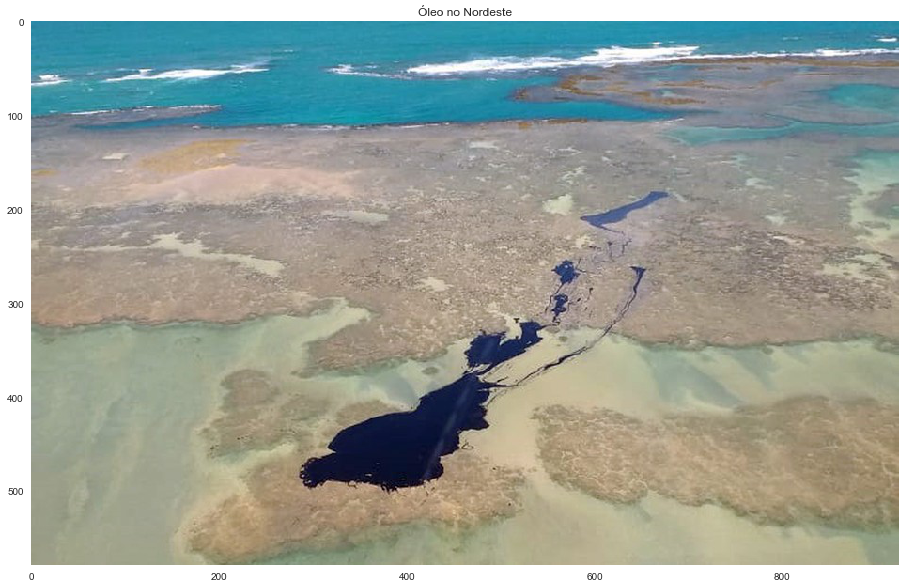

In [7]:
imagem = cv2.imread("imagens/petroleo-pernambuco-3-.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.title("Óleo no Nordeste")
plt.imshow(imagem)

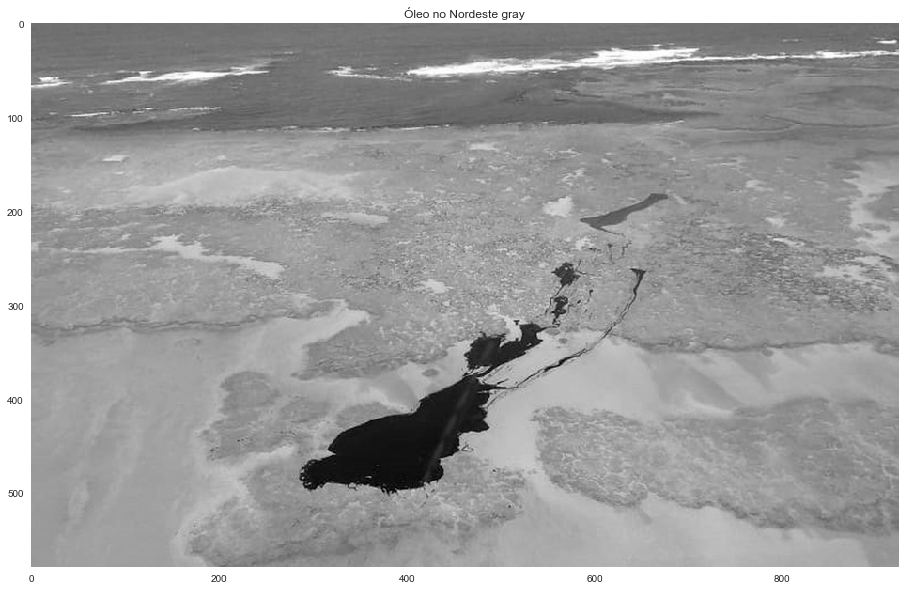

In [8]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 10))
plt.title("Óleo no Nordeste gray")
plt.imshow(imagem_gray, cmap="gray")

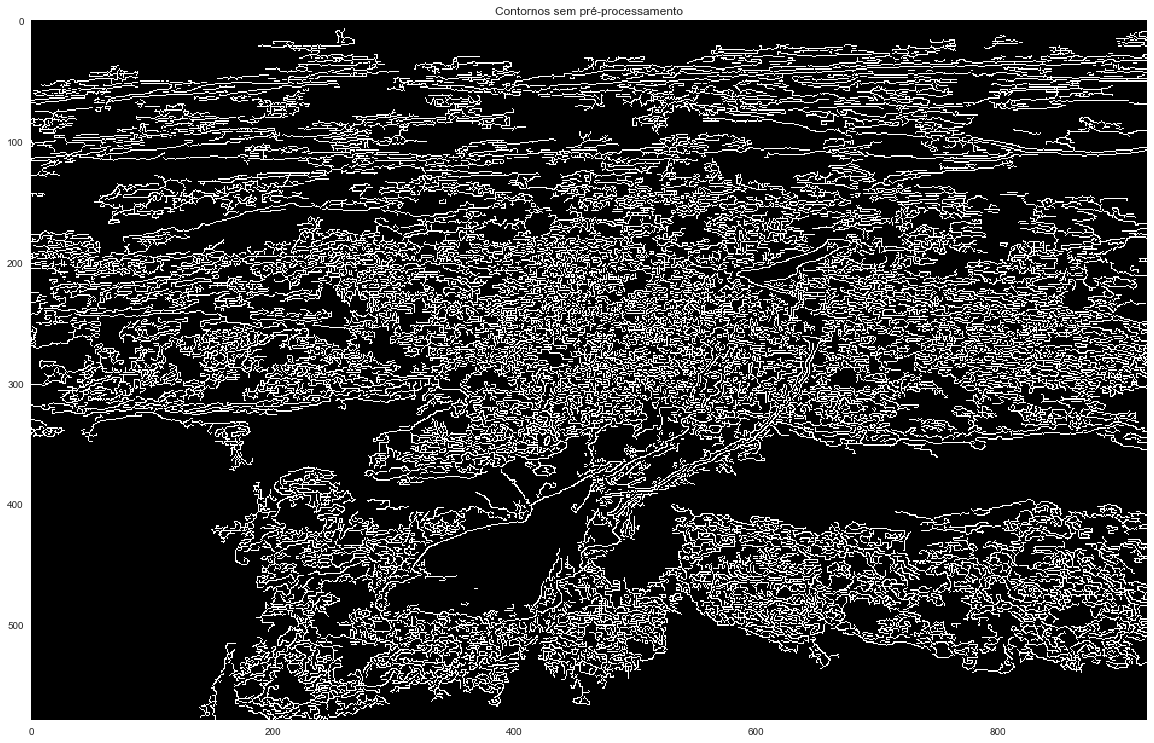

In [9]:
imagem_bordas = cv2.Canny(imagem_gray, 1, 100)

plt.figure(figsize=(20, 20))
plt.title("Contornos sem pré-processamento")
plt.imshow(imagem_bordas, cmap="gray")

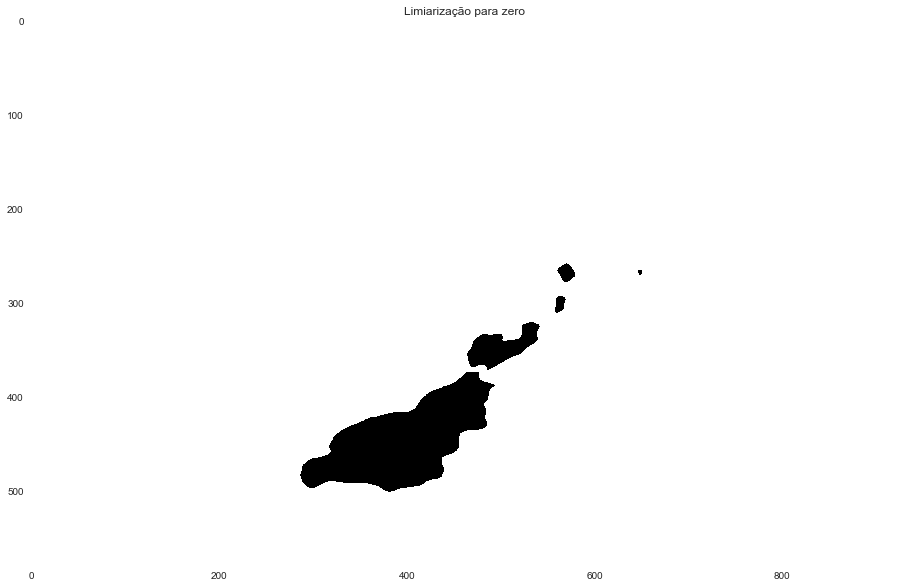

In [10]:
imagem_suav_padrao = cv2.GaussianBlur(imagem_gray, (19,19), 0)
ret, imagem_limiarizada = cv2.threshold(imagem_suav_padrao, 95, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 10))
plt.title("Limiarização para zero")
plt.imshow(imagem_limiarizada, cmap="gray")

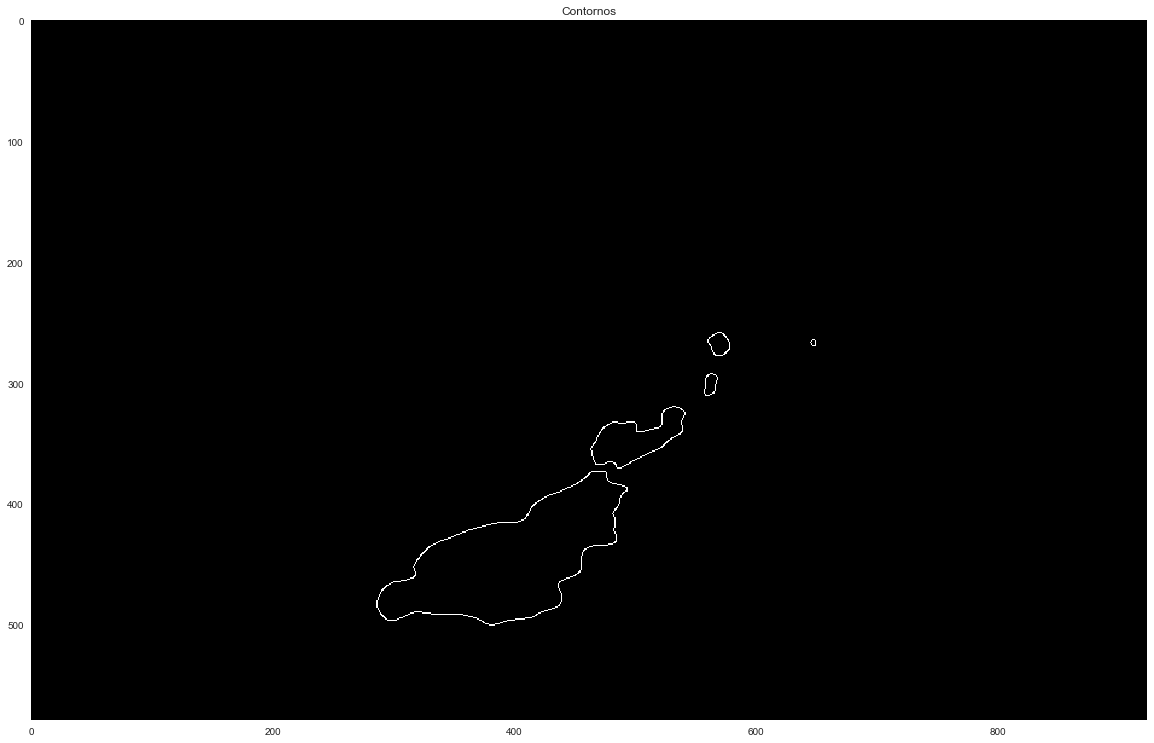

In [11]:
imagem_bordas = cv2.Canny(imagem_limiarizada, 1, 100)

plt.figure(figsize=(20, 20))
plt.title("Contornos")
plt.imshow(imagem_bordas, cmap="gray")

Contornos encontrados 5


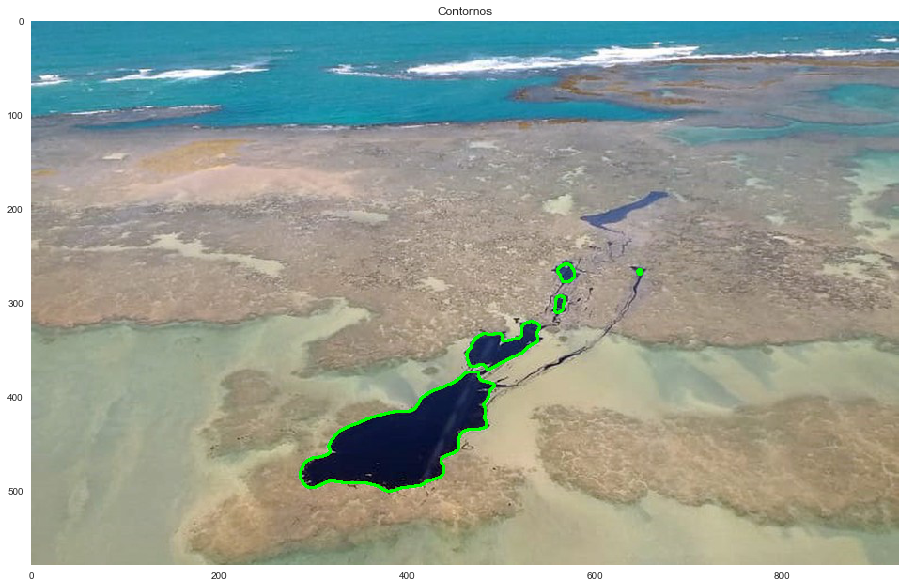

In [18]:
_, contornos_formas, _ = cv2.findContours(imagem_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_formas)))

imagem_contornos = imagem.copy()

cv2.drawContours(imagem_contornos, contornos_formas, -1, (0,255,0), 2)

plt.figure(figsize=(20, 10))
plt.title("Contornos")
plt.imshow(imagem_contornos)